In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
from scipy import ndimage
import re
import glob
import datetime
import os
import seaborn

from astropy.utils.data import get_file_contents
import astropy.units as u
from astropy.time import Time
from astropy.utils.console import ProgressBar

import pandas as pd

%matplotlib inline
plt.style.use('ggplot')
from IPython.utils import io

/home/panoptes/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Load the PANOPTES module dir
import sys
sys.path.append('../')

# For development
%load_ext autoreload
%autoreload 2

from panoptes.utils.images import *

INFO:PanoptesLogger:

INFO:PanoptesLogger:********************************************************************************
INFO:PanoptesLogger:

DEBUG:PanoptesLogger:Adding warning logging to: PanError
DEBUG:PanoptesLogger:Adding warning logging to: SerialData
DEBUG:PanoptesLogger:Adding warning logging to: PanStateMachine
DEBUG:PanoptesLogger:Adding warning logging to: WeatherStation
DEBUG:PanoptesLogger:Adding warning logging to: AbstractCamera
DEBUG:PanoptesLogger:Adding warning logging to: Observation
DEBUG:PanoptesLogger:Adding warning logging to: Target
DEBUG:PanoptesLogger:Adding warning logging to: Scheduler
DEBUG:PanoptesLogger:Adding warning logging to: Observatory
DEBUG:PanoptesLogger:Adding warning logging to: Panoptes
DEBUG:PanoptesLogger:Adding warning logging to: Messaging
DEBUG:PanoptesLogger:Adding warning logging to: EnvironmentalMonitor
DEBUG:PanoptesLogger:Adding warning logging to: Webcams
DEBUG:PanoptesLogger:Adding warning logging to: PanSensors


In [26]:
dir1 = '/var/panoptes/images/20150925/01_150924_22[4-7]*.cr2'

In [28]:
cr2_files = glob.glob(dir1)
cr2_files.sort()
cr2_files

['/var/panoptes/images/20150925/01_150924_224012.cr2',
 '/var/panoptes/images/20150925/01_150924_224027.cr2',
 '/var/panoptes/images/20150925/01_150924_224042.cr2',
 '/var/panoptes/images/20150925/01_150924_224057.cr2',
 '/var/panoptes/images/20150925/01_150924_224112.cr2',
 '/var/panoptes/images/20150925/01_150924_224127.cr2',
 '/var/panoptes/images/20150925/01_150924_224142.cr2',
 '/var/panoptes/images/20150925/01_150924_224157.cr2',
 '/var/panoptes/images/20150925/01_150924_224212.cr2',
 '/var/panoptes/images/20150925/01_150924_224228.cr2',
 '/var/panoptes/images/20150925/01_150924_224242.cr2',
 '/var/panoptes/images/20150925/01_150924_224257.cr2',
 '/var/panoptes/images/20150925/01_150924_224312.cr2',
 '/var/panoptes/images/20150925/01_150924_224327.cr2',
 '/var/panoptes/images/20150925/01_150924_224343.cr2',
 '/var/panoptes/images/20150925/01_150924_224357.cr2',
 '/var/panoptes/images/20150925/01_150924_224413.cr2',
 '/var/panoptes/images/20150925/01_150924_224427.cr2',
 '/var/pan

In [29]:
pixel_scale = ((206.265) * (5.4 * u.micron) / (85 * u.mm)).cgs * u.arcsecond
pixel_scale

<Quantity 0.013103894117647057 arcsec>

In [30]:
def compare_files(f0, f1, compare=False):
    pgm_00 = f0.replace('.cr2','.pgm')
    pgm_01 = f1.replace('.cr2','.pgm')    
    
    #if not os.path.exists(pgm_00):
    pgm_00 = cr2_to_pgm(f0)
    #else:
    #    print("Path exists, using {}".format(pgm_00))
                
    #if not os.path.exists(pgm_01):
    pgm_01 = cr2_to_pgm(f1)
    #else:
    #    print("Path exists, using {}".format(pgm_01))                

#    exif_00 = read_exif(pgm_00)
    exif_01 = read_exif(f1)    
    

    raw_data_00 = read_pgm(pgm_00)
    # print(raw_data_00)
    raw_data_01 = read_pgm(pgm_01)
    # print(raw_data_01)

    x0, y0 = measure_offset(raw_data_00,raw_data_01, box_width=200)

    fmt = '%a %b %d %H:%M:%S %Y'
    t = datetime.datetime.strptime(exif_01.get('Timestamp'), fmt)

    if compare:
        with io.capture_output() as captured:    
            !/var/panoptes/bin/measure_offset $f0 $f1 

        x1 = float(get_file_contents('xcent.txt'))
        y1 = float(get_file_contents('ycent.txt'))
        
        vals = (x0, y0, x1, y1, t)
    else:
        vals = (x0, y0, t)

    return vals

In [13]:
comparison = []

for i in np.arange(len(cr2_files)):
    if i < len(cr2_files) - 1:
        comparison.append(compare_files(cr2_files[i], cr2_files[i+1]))

In [14]:
comparison

[(-0.5, 0.0, datetime.datetime(2015, 9, 25, 8, 48, 19)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 48, 34)),
 (-0.5, 0.0, datetime.datetime(2015, 9, 25, 8, 48, 50)),
 (1.0, 0.0, datetime.datetime(2015, 9, 25, 8, 49, 5)),
 (1.0, 0.0, datetime.datetime(2015, 9, 25, 8, 49, 20)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 49, 34)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 49, 50)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 50, 5)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 50, 20)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 50, 35)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 50, 50)),
 (0.66666666666666663, 0.0, datetime.datetime(2015, 9, 25, 8, 51, 5)),
 (1.3333333333333333, 0.0, datetime.datetime(2015, 9, 25, 8, 51, 19)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 51, 34)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 51, 50)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 52, 5)),
 (0.0, 0.0, datetime.datetime(2015, 9, 25, 8, 52, 19)),
 (0.0, 0.0, datetim

In [15]:
x0 = [x[0] for x in comparison]
y0 = [x[1]*-1 for x in comparison]
#x1 = [x[2] for x in comparison]
#y1 = [x[3] for x in comparison]

dates = [x[-1] for x in comparison]
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2015-09-25 08:48:19', '2015-09-25 08:48:34',
               '2015-09-25 08:48:50', '2015-09-25 08:49:05',
               '2015-09-25 08:49:20', '2015-09-25 08:49:34',
               '2015-09-25 08:49:50', '2015-09-25 08:50:05',
               '2015-09-25 08:50:20', '2015-09-25 08:50:35',
               '2015-09-25 08:50:50', '2015-09-25 08:51:05',
               '2015-09-25 08:51:19', '2015-09-25 08:51:34',
               '2015-09-25 08:51:50', '2015-09-25 08:52:05',
               '2015-09-25 08:52:19', '2015-09-25 08:52:35',
               '2015-09-25 08:52:50', '2015-09-25 08:53:05',
               '2015-09-25 08:53:20', '2015-09-25 08:53:35',
               '2015-09-25 08:53:50', '2015-09-25 08:54:05',
               '2015-09-25 08:54:20', '2015-09-25 08:54:35',
               '2015-09-25 08:54:50', '2015-09-25 08:55:05'],
              dtype='datetime64[ns]', freq=None, tz=None)

In [16]:
x0_offset = pd.DataFrame(x0, dt_index)
y0_offset = pd.DataFrame(y0, dt_index)
#x1_offset = pd.DataFrame(y1, dt_index)
#y1_offset = pd.DataFrame(x1, dt_index)

In [17]:
#series = pd.concat([x0_offset, x1_offset, y0_offset, y1_offset], axis=1)
#series.columns=["Gee $\Delta{x}$","Guyon $\Delta{x}$","Gee $\Delta{y}$","Guyon $\Delta{y}$"]

series = pd.concat([x0_offset, y0_offset], axis=1)
series.columns=["Gee $\Delta{x}$","Gee $\Delta{y}$"]

series.index = dt_index

In [18]:
series

,Gee $\Delta{x}$,Gee $\Delta{y}$
2015-09-25 08:48:19,-0.500000,-0.000000
2015-09-25 08:48:34,0.000000,-0.000000
2015-09-25 08:48:50,-0.500000,-0.000000
2015-09-25 08:49:05,1.000000,-0.000000
2015-09-25 08:49:20,1.000000,-0.000000
2015-09-25 08:49:34,0.000000,-0.000000
2015-09-25 08:49:50,0.000000,-0.000000
2015-09-25 08:50:05,0.000000,-0.000000
2015-09-25 08:50:20,0.000000,-0.000000
2015-09-25 08:50:35,0.000000,-0.000000


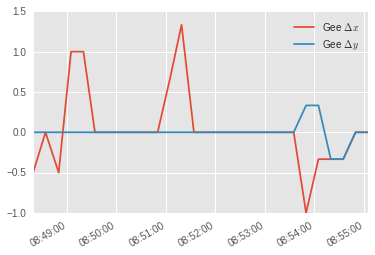

In [19]:
series.plot()
plt.legend(loc=1)